<a href="https://colab.research.google.com/github/leomanfree/Creative_Fork_FastAI_LearnSprint/blob/main/03_Model_Rebuild_From_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install** **FastAI**

In [1]:
!pip install fastai -q --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.7 MB/s eta 0:00:00


In [2]:
from fastai.basics import*
from fastai.vision.all import*
from fastai.callback.all import*

### #download Oxford pet dataset

In [4]:
path=untar_data(URLs.PETS)

#define labels regex to extract breed name from filenames

In [5]:
pat = r'^(.*)_\d+.jpg$$'

#build the datablock

In [7]:
# Build the DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(pat), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)


#create dataloaders

# 🧠 Philosophical Note: Aristotelian Logic and the Architecture of Learning
#
### Deep learning architectures are built in layers — each one transforming data into
### progressively more abstract representations.
#
### But this logic of transformation has ancient roots.
#
### Aristotle’s "Organon" formalized the first structured theory of logic,
### introducing categorical reasoning based on classes, predicates, and inferences.
#
### In many ways, modern ML layers function like **logical operators**:
### - They map particular inputs into general representations.
### - They form hierarchical abstractions, like syllogistic steps.
#
### This echoes the structure of Aristotelian thought:
### → Sensory input → Perceptual form → Conceptual structure → Rational inference
#
### Today, we build:
### - DataBlock() to define structure
### - cnn_learner() to instantiate a reasoning engine
### - fit() to learn via iteration
#
### But underneath it all, there’s a lineage of logic that stretches back to antiquity.
#
### 📚 Ref: Aristotle, *Posterior Analytics* (circa 350 BCE)
### Suggested companion: Lukasiewicz, *Aristotle's Syllogistic from the Standpoint of Modern Formal Logic*


In [8]:
dls = dblock.dataloaders(path/'images', bs=64)

#create learner with resnet34

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 143MB/s]


train for 4 epoochs

In [10]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.939009,0.364077,0.126522,41:13
1,0.731750,0.287468,0.089310,40:27
2,0.418735,0.232762,0.068336,40:41
3,0.329764,0.232967,0.068336,40:50


In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.380257,0.301990,0.095399,58:36
1,0.256309,0.225209,0.071042,57:23


# 🌀 Philosophical Note: Hegel and Dialectical Deep Learning
#
### Hegel’s logic isn’t propositional but generative. Knowledge progresses through dialectic:
### BEING → NOTHING → BECOMING.
### Negation is not error — it's evolution.
#
### A dialectical AI would:
### - Learn through internal contradictions
### - Self-transform its structure by negating assumptions
### - Embody the logic of becoming (Werden), not just classification
#
### Inspired by:
### - *The Science of Logic* (Wissenschaft der Logik), esp. Book I (Quality → Quantity → Measure)
### - *Phenomenology of Spirit* (Phänomenologie des Geistes): chapters on Consciousness and Understanding
#
### 💡 While learning to replicate a minimal deep learning engine,
### I began wondering if we could build models that reflect — not just predict.
### This opened up a research window, and I found:
#
### 📄 "Self-reflecting Large Language Models: A Hegelian Dialectical Approach" (arXiv:2501.14917)
### → https://arxiv.org/abs/2501.14917
#
### It's the first peer-reviewed attempt to computationally apply Hegel’s dialectic
### to improve self-reflection in LLMs. Worth exploring deeply.
#
### Modern AI optimizes cost functions.
### A dialectical AI would optimize self-understanding.


# 🧠 Research Note: From Brilliant Sophists to Human-AI Neuroengineering
#
### Most modern AI is statistical. It optimizes likelihood, not meaning.
### LLMs are brilliant sophists: they imitate truth by predicting what is most probable.
### Their strength is fluency, not understanding.
#
### As Marie-Louise von Franz writes in *On Divination and Synchronicity*:
### > "Statistics cannot capture the meaningfulness of synchronistic events."
#
### Jung’s synchronicity is acausal, subjective, and singular.
### Hegel’s dialectic is not linear or statistical — it’s transformation through contradiction.
#
### This reveals a structural gap:
### → Current AI models simulate cognition, but do not self-transform.
#
### Rather than anthropomorphizing AI or awaiting artificial consciousness,
### we can reframe the challenge:
#
### → How can we use AI to scaffold human cognitive evolution?
### → What workflows enable externalized reasoning + internalized insight?
### → How do we connect learning systems with biological adaptation?
#
### This is where neuroengineering becomes essential:
### - AI as co-processor for pattern recognition, abstraction, and feedback
### - Real-time closed-loop systems between model output and neuroplasticity
### - Interfaces that augment—not replace—cognitive function
#
### The future may not be AI becoming human.
### It may be **humans becoming hybrid**, through engineered cognitive stacks.
#
### This is not speculative philosophy.
### It’s an open research frontier — and an engineering problem.


#load custom image

In [12]:
#load custom image
# Replace '/path/to/your/image.jpg' with the actual path to your image
img_path = path/'images/basset_hound_163.jpg' # Example using a file from the Oxford-IIIT Pet Dataset
img = PILImage.create(img_path)

#predict breed
pread, pread_idx, probs=learn.predict(img)
print(f'Prediction: {pread}; Probability: {probs[pread_idx]:.04f}')

Prediction: basset_hound; Probability: 1.0000


#predict breed

In [13]:
pread, pread_idx, probs = learn.predict(img)
print(f'Prediction: {pread}; Probability: {probs[pread_idx]:.04f}')

Prediction: basset_hound; Probability: 1.0000


<Axes: title={'center': 'Prediction: basset_hound (100.00%)'}>

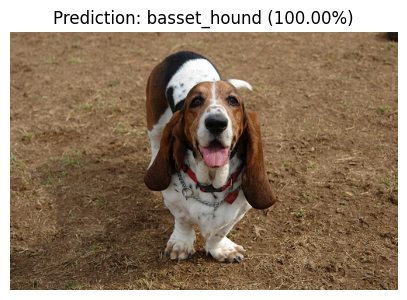

In [16]:
img.show(title=f"Prediction: {pread} ({probs[pread_idx]:.2%})")

Saving IMG-20250403-WA0003.jpg to IMG-20250403-WA0003.jpg


Predicted: scottish_terrier; Confidence: 0.5879


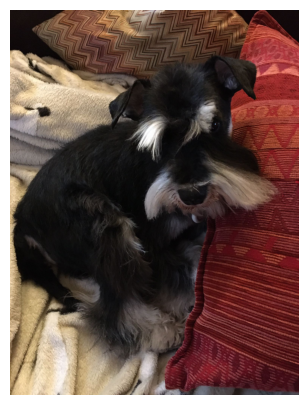

In [20]:
from google.colab import files
from fastai.vision.all import *

# Upload file
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and predict
img = PILImage.create(img_path)
img.show()

pred_class, pred_idx, probs = learn.predict(img)
print(f"Predicted: {pred_class}; Confidence: {probs[pred_idx]:.4f}")
